<a href="https://colab.research.google.com/github/MariaSanSal/PIA05/blob/main/PIA05_Guia_Tarea.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelo de clasificación de imágenes basado en una red neuronal profunda

Se pide utilizar el dataset que viene precargado en la librería Keras: [CIFAR10](https://keras.io/api/datasets/cifar10/)


1. Importa los módulos necesarios de la librería Keras. Sugerencia:


```
import numpy as np
from keras.models import Sequential
from keras.layers import Flatten, Dense
```



In [4]:

#	Importa la librerías
# Importa los módulos necesarios para construir una red neuronal profunda: Sequential, Dense y Flatten
import numpy as np
from keras.models import Sequential
from keras.layers import Flatten, Dense

2. Importa el dataset CIFAR10 de Keras, en un conjunto de datos de entrenamiento y un conjunto de datos para test. Sugerencia:


```
from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
```



In [5]:
from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


3. Explora los datos, especialmente, las dimensiones del dataset. Aplica normalización a los datos de entrada y la técnica one-hot encoding a los de salida.

*Sugerencia para normalizar:*


```
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0
```
*Sugerencia de aplicación one-hot encoding para categorizar etiquetas:*


```
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
```




In [6]:

# Exploración de los datos
X_train.shape


(50000, 32, 32, 3)

In [7]:

len(y_train)

50000

In [8]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [9]:
print('Training data shape:', X_train .shape)
print('Training labels shape:', y_train.shape)
print('Test data shape:', X_test.shape)
print('Test labels shape:', y_test.shape)

Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)


In [10]:
class_names = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]


In [11]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [12]:

from tensorflow.keras.utils import to_categorical
to_categorical?
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

4. Crea un modelo basado en redes neuronales profundas que tenga más de una capa de tipo Dense (Keras). Si es necesario, usa la capa Flatten al principio. Prueba un primer modelo lo más sencillo posible.

In [ ]:
import keras

model = keras.Sequential([
    # capa para que tengamos una dimensión "aplanar". En nuestro caso necesario al tener varias dimensiones
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(128, activation = 'relu'), # capa con  neuronas y activación relu
    keras.layers.Dense(10, activation = 'softmax') # capa con  neuronas y activación softmax que se suele utilizar en problema de clasificación múltiple
])



5. Configura el entrenamiento utilizando la función compile, con la función loss = 'categorical_crossentropy' y el optimizador Adam. Utiliza la función fit para entrenar el modelo, inicialmente, con 20 epochs.

In [ ]:

#usaremos Adam como indica, que además indican que presenta un mejor comportamiento general y
#es la que recomiendan en los primeros entrenamiento
#compile?
model.compile(optimizer= 'Adam', loss = 'categorical_crossentropy')
model.fit(X_train, y_train, epochs = 20)



Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 2.0044
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 1.7580
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 1.6882
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 1.6517
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 1.6334
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 1.6200
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 1.5854
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 1.5828
Epoch 9/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 1.5638
Epoch 10/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 1.5552
Epoch 11/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - loss: 1.5371
Epoch 12/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - loss: 1.5487
Epoch 13/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 1.5247
Epoch 14/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 1.5216
Epoch 15/20
1563

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         393,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 394,634 (1.51 MB)

 Trainable params: 394,634 (1.51 MB)

 Non-trainable params: 0 (0.00 B)

6. Crea un nuevo modelo con más capas y mayor número de neuronas. Entrénalo utilizando un número mayor de epochs y analiza el resultado. ¿Has conseguido mejorar la precisión? haz varias pruebas y quédate con el modelo que mejores resultados da.

In [ ]:
import keras

model = keras.Sequential([
    # capa para que tengamos una dimensión "aplanar". En nuestro caso necesario al tener varias dimensiones
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(10, activation = 'softmax') # capa con  neuronas y activación softmax que se suele utilizar en problema de clasificación múltiple
])

model.compile(optimizer= 'Adam', loss = 'categorical_crossentropy')
#model.fit(X_train, y_train, batch_size=128, epochs = 20, validation_data = (X_test, y_test))
model.fit(X_train, y_train, batch_size=256, epochs = 20, validation_data = (X_test, y_test))



/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 2.0808 - val_loss: 1.8011
Epoch 2/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 1.7868 - val_loss: 1.7460
Epoch 3/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 1.7273 - val_loss: 1.6834
Epoch 4/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 1.6751 - val_loss: 1.6882
Epoch 5/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 1.6215 - val_loss: 1.6263
Epoch 6/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 1.6021 - val_loss: 1.5855
Epoch 7/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 1.5695 - val_loss: 1.5900
Epoch 8/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 1.5547 - val_loss: 1.5552
Epoch 9/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 1.5330 - val_loss: 1.5348
Epoch 10/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 1.5183 - val_loss: 1.5119
Epoch 11/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 1.4923 - val_loss: 1.5467
Epoch 12/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
import keras

model = keras.Sequential([
    # capa para que tengamos una dimensión "aplanar". En nuestro caso necesario al tener varias dimensiones
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation ="softmax") # capa con  neuronas y activación softmax que se suele utilizar en problema de clasificación múltiple
])


model.compile(optimizer= 'Adam', loss = 'categorical_crossentropy')
#model.fit(X_train, y_train, batch_size=128, epochs = 20, validation_data = (X_test, y_test))
model.fit(X_train, y_train, batch_size=256, epochs = 20, validation_data = (X_test, y_test))


Epoch 1/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - loss: 2.0680 - val_loss: 1.7984
Epoch 2/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - loss: 1.7662 - val_loss: 1.7034
Epoch 3/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 1.6708 - val_loss: 1.6270
Epoch 4/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 1.6178 - val_loss: 1.5761
Epoch 5/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 1.5496 - val_loss: 1.5328
Epoch 6/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - loss: 1.5079 - val_loss: 1.5145
Epoch 7/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 1.4795 - val_loss: 1.4842
Epoch 8/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 1.4645 - val_loss: 1.4994
Epoch 9/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 1.4437 - val_loss: 1.4649
Epoch 10/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 1.4112 - val_loss: 1.4688
Epoch 11/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - loss: 1.3861 - val_loss: 1.4427
Epoch 12/20
196/196 ━━━━━━━━━━━━━━━━━━

In [ ]:
import keras

model = keras.Sequential([
 keras.layers.Flatten(),
 keras.layers.Dense(512,input_shape=(32,32,3), activation="relu"),
  keras.layers.Dense(256, activation="relu"),
  keras.layers.Dense(128, activation="relu"),
   keras.layers.Dense(10, activation='softmax')
])


model.compile(optimizer= 'Adam', loss = 'categorical_crossentropy')
model.fit(X_train,  y_train, batch_size=128, epochs = 20)

Epoch 1/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 15s 34ms/step - loss: 2.0455
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 35ms/step - loss: 1.6996
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 35ms/step - loss: 1.6119
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - loss: 1.5278
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 22s 40ms/step - loss: 1.4731
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 14s 35ms/step - loss: 1.4384
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - loss: 1.4087
Epoch 8/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 14s 35ms/step - loss: 1.3670
Epoch 9/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - loss: 1.3472
Epoch 10/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 34ms/step - loss: 1.3203
Epoch 11/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 14s 35ms/step - loss: 1.2862
Epoch 12/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - loss: 1.2673
Epoch 13/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 35ms/step - loss: 1.2315
Epoch 14/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 14s 35ms/step - loss: 1.2110
Epoch 15/20
391/391 ━━━━━━━━━

In [30]:
import keras

model = keras.Sequential([
 keras.layers.Flatten(input_shape=(32,32,3)),
 keras.layers.Dense(512, input_shape=(32,32,3), activation="relu"),
  keras.layers.Dense(512, input_shape=(32,32,3), activation="relu"),
 keras.layers.Dense(512, input_shape=(32,32,3), activation="relu"),
  keras.layers.Dense(512, input_shape=(32,32,3), activation="relu"),
   keras.layers.Dense(512, input_shape=(32,32,3), activation="relu"),
   keras.layers.Dense(10, input_shape=(32,32,3),activation='softmax')
])

model.summary()

#model.compile(optimizer= 'Adam', loss = 'categorical_crossentropy')
#model.fit(X_train,  y_train, epochs = 20)

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_13 (Flatten)                 │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_50 (Dense)                     │ (None, 512)                 │       1,573,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_51 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_52 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_53 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_54 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_55 (Dense)                     │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,629,130 (10.03 MB)

 Trainable params: 2,629,130 (10.03 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer= 'Adam', loss = 'categorical_crossentropy')
model.fit(X_train,  y_train, batch_size=128, epochs = 20)

Epoch 1/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 26s 61ms/step - loss: 1.6669
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 40s 59ms/step - loss: 1.5943
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 24s 61ms/step - loss: 1.5530
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 61ms/step - loss: 1.5014
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 62ms/step - loss: 1.4660
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 24s 62ms/step - loss: 1.4502
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 40s 60ms/step - loss: 1.3958
Epoch 8/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 43s 66ms/step - loss: 1.3650
Epoch 9/20
 29/391 ━━━━━━━━━━━━━━━━━━━━ 21s 58ms/step - loss: 1.3159

7. Utiliza el método evaluate para ver la precisión que se alcanzaría con datos nuevos, aplicándolo al conjunto de datos de test. ¿Es muy diferente a la precisión alcanzada en el entrenamiento?

In [ ]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 1.3623


1.367958664894104

8. Explora de forma visual la precisión que se consigue, representando las primeras 25 imágenes del conjunto de datos de test, y comparando la etiqueta real con la de la predicción. Aquí tienes una posible forma de hacerlo (recuerda poner el nombre de tu modelo a la hora de aplicar el método predict):


```
predictions = model.predict(X_test)

class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(X_test[i], cmap=plt.cm.binary)
    predicted_label = predictions[i]
    true_label = y_test[i]
    if predicted_label.argmax() == true_label.tolist().index(1.):
      color = 'green'
    else:
      color = 'red'
    plt.xlabel("{} ({})".format(class_names[predicted_label.argmax()],
                                  class_names[true_label.tolist().index(1.)]),
                                  color=color)
```



313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


Text(0.5, 0, 'deer\xa0(dog)')

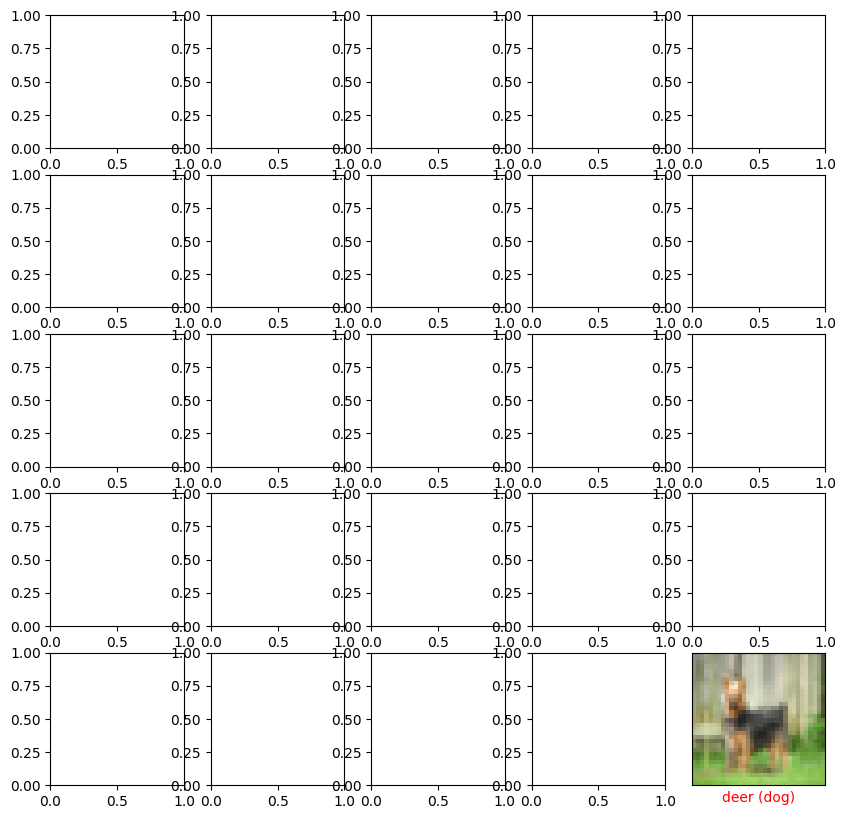

In [ ]:
import matplotlib.pyplot as plt
predictions=model.predict(X_test)

class_names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

plt.figure(figsize=(10,10))
for i in range(25):
 plt.subplot(5,5,i+1)
plt.xticks([])
plt.yticks([])
plt.grid('off')
plt.imshow(X_test[i],cmap=plt.cm.binary)
predicted_label=predictions[i]
true_label=y_test[i]
if predicted_label.argmax()==true_label.tolist().index(1.):
  color="green"
else:
  color='red'
plt.xlabel("{} ({})".format(class_names[predicted_label.argmax()],class_names[true_label.tolist().index(1.)]),
color=color)